# mnist using png images from scratch
mnist data set contains 0-9 handwritten iages of 28x28 pixels
Goal of the exercise to do handwriing recognition of these images.

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt

In [159]:
training_path = './mnist_png/training'
testing_path = './mnist_png/testing'
img_width, img_height = 28, 28
nb_train_samples = 60000
nb_validation_samples = 10000
epochs = 5
batch_size = 128 # change this to 16 to speed up processing by 7 times

In [160]:
import os
from IPython.display import display, Image
names = [f for f in os.listdir(training_path + '/1') if f.endswith('.png')]
for name in names[:5]:
    display(Image(training_path + '/1/' + name, width=100))

In [161]:
input_shape = (img_width, img_height, 1) # 1=grayscale, 3=color image = RGB.

In [162]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_15 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                36928     
__________

In [165]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [166]:
data_gen = ImageDataGenerator(rescale=1. / 255)
# data_gen = ImageDataGenerator()
train_batch = data_gen.flow_from_directory(training_path, target_size=(28,28),
                                          batch_size=batch_size, color_mode='grayscale',)
test_batch = data_gen.flow_from_directory(testing_path, target_size=(28,28),
                                         batch_size=batch_size, color_mode='grayscale',)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [167]:
history = model.fit_generator(
    train_batch,
    steps_per_epoch=nb_train_samples ,
    epochs=epochs,
    validation_data=test_batch,
    validation_steps=nb_validation_samples 
)

#model.save_weights('first_try.h5')

Epoch 1/5
60000/60000 [==============================] - 1731s - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0871 - val_acc: 0.9926
Epoch 2/5
60000/60000 [==============================] - 1738s - loss: 7.1278e-04 - acc: 0.9999 - val_loss: 0.0986 - val_acc: 0.9931
Epoch 3/5
60000/60000 [==============================] - 1737s - loss: 2.6735e-04 - acc: 1.0000 - val_loss: 0.0986 - val_acc: 0.9931
Epoch 4/5
60000/60000 [==============================] - 1741s - loss: 2.6875e-04 - acc: 1.0000 - val_loss: 0.0986 - val_acc: 0.9931
Epoch 5/5
60000/60000 [==============================] - 1739s - loss: 2.6875e-04 - acc: 1.0000 - val_loss: 0.0987 - val_acc: 0.9931


In [147]:
history.history

{'acc': [0.98578237949327352,
  0.99794657819610233,
  0.99846481902253625,
  0.99859688453351325,
  0.99820921608546465],
 'loss': [0.12692443801454478,
  0.0077038021801933698,
  0.0076935036154400244,
  0.010538318520232532,
  0.021030070118126788],
 'val_acc': [0.98879642496210207,
  0.9888734353268428,
  0.98972689341256792,
  0.99028865588681148,
  0.99125995701100011],
 'val_loss': [0.057518458461166863,
  0.076320775977174793,
  0.093538571924232955,
  0.10965876998984594,
  0.13452685842210066]}

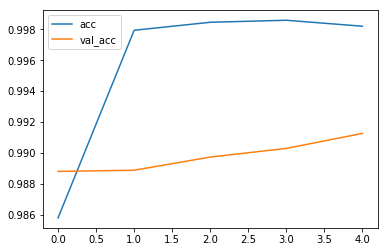

In [148]:
# model.save('mnist_trained_model_rmsprop.h5')
plt.plot(history.history['acc'])
# plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

!ls -lh

adam optimizer = 97.62% accuracy